In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun, Angle
%matplotlib inline

## Example from Astropy
(http://docs.astropy.org/en/stable/coordinates/observing-example.html)

In [140]:
m33 = SkyCoord.from_name('M33')  
bear_mountain = EarthLocation(lat=41.3*u.deg, lon=-74*u.deg, height=390*u.m)
utcoffset = -4*u.hour  # Eastern Daylight Time
time = Time('2012-7-12 23:00:00') - utcoffset
m33altaz = m33.transform_to(AltAz(obstime=time,location=bear_mountain))  
print m33altaz.altaz

<SkyCoord (AltAz: obstime=2012-07-13 03:00:00.000, location=(1322772.7367951265, -4613056.748218293, 4187767.9533615136) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0, obswl=1.0 micron): (az, alt) in deg
    (47.30811529, 0.12926316)>


In [141]:
midnight = Time('2012-7-13 00:00:00') - utcoffset
delta_midnight = np.linspace(-2, 7, 100)*u.hour
m33altazs = m33.transform_to(AltAz(obstime=midnight+delta_midnight, location=bear_mountain))  

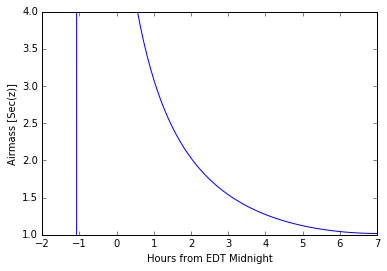

In [142]:
plt.plot(delta_midnight, m33altazs.secz)  
plt.xlim(-2, 7)  
plt.ylim(1, 4)  
plt.xlabel('Hours from EDT Midnight')  
plt.ylabel('Airmass [Sec(z)]') 

In [143]:
m33altazs.secz

<Quantity [  -7.71800149,  -8.41870063,  -9.2816512 , -10.36889058,
            -11.77880469, -13.67730861, -16.36777228, -20.47053096,
            -27.48317347, -42.17926122, -92.3767669 , 443.24947252,
             64.39932923,  34.50257116,  23.46640671,  17.72652598,
             14.21038671,  11.83691863,  10.1280439 ,   8.83971234,
              7.83431594,   7.02836456,   6.36826427,   5.8180359 ,
              5.35262829,   4.95406255,   4.60910122,   4.30778222,
              4.04246512,   3.80719223,   3.59724975,   3.40885939,
              3.23895741,   3.08503346,   2.94501115,   2.81715826,
              2.70001836,   2.59235812,   2.49312622,   2.40142107,
              2.3164651 ,   2.23758422,   2.16419122,   2.09577225,
              2.03187576,   1.97210337,   1.91610233,   1.86355919,
              1.81419454,   1.7677585 ,   1.72402699,   1.68279851,
              1.64389138,   1.60714144,   1.57239994,   1.53953188,
              1.50841443,   1.47893564,   1.4509

In [12]:
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
times = midnight + delta_midnight
altazframe = AltAz(obstime=times, location=bear_mountain)
sunaltazs = get_sun(times).transform_to(altazframe)
m33altazs = m33.transform_to(altazframe)  

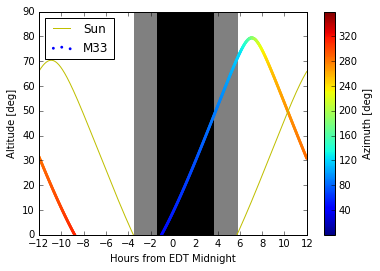

In [13]:
plt.plot(delta_midnight, sunaltazs.alt, color='y', label='Sun')  
plt.scatter(delta_midnight, m33altazs.alt, c=m33altazs.az, label='M33', lw=0, s=8)  
plt.fill_between(delta_midnight.to('hr').value, 0, 90, sunaltazs.alt < -0*u.deg, color='0.5', zorder=0)  
plt.fill_between(delta_midnight.to('hr').value, 0, 90, sunaltazs.alt < -18*u.deg, color='k', zorder=0)  
plt.colorbar().set_label('Azimuth [deg]')  
plt.legend(loc='upper left')  
plt.xlim(-12, 12)  
plt.xticks(np.arange(13)*2 -12)  
plt.ylim(0, 90)  
plt.xlabel('Hours from EDT Midnight')  
plt.ylabel('Altitude [deg]')  

<hr>
## Catalog Selection
- the goal is to select suitable target for the observation by ranking its importance using its position on the sky

In [1040]:
df = pd.read_csv('/Users/taweewat/Documents/xray_project/ned-result/final_cut.csv',\
                    keep_default_na=False, na_values=[""])
final=df[df.followup=='follow']
pheo2=final.loc[(((final.loc[:,'RA']-356.18307)**2+(final.loc[:,'DEC']+42.720204)**2)**0.5).idxmin(),:]

ra0=np.array(df['RA0'][df.followup=='follow'])
dec0=np.array(df['DEC0'][df.followup=='follow'])

print len(ra0), len(dec0)

list_obj=[]
for i in range(len(ra0)):
    list_obj.append(SkyCoord(ra0[i], dec0[i], frame='icrs', unit='deg'))
list_obj_a=np.array(list_obj)

219 219


In [1041]:
#Set up the location and time for observing at Las Campanas
lco_location = EarthLocation(lon=-70*u.deg+42*u.arcmin+07.2*u.arcsec, lat=-29*u.deg+12*u.arcsec, height=2380*u.m)
utcoffset = -4*u.hour  # Eastern Daylight Time (Chile)
time = Time('2016-7-4 00:00:00') - utcoffset

In [1042]:
midnight = Time('2016-7-4 00:00:00',precision=0) - utcoffset
delta_midnight = np.linspace(-5.5, 7.5, 131)*u.hour
times = midnight + delta_midnight
altazframe = AltAz(obstime=times, location=lco_location)
sunaltazs = get_sun(times).transform_to(altazframe)

seczs_l=[]
seczs_min_l=[]
seczs_argmin_l=[]
alts_l=[]
azs_l=[]
for i in list_obj:
    x=i.transform_to(AltAz(obstime=midnight+delta_midnight, location=lco_location))
    seczs_l.append(x.secz)
    seczs_min_l.append(np.min(abs(x.secz-1.0)).value+1.)
    seczs_argmin_l.append(np.argmin(abs(x.secz-1.0)))
    alts_l.append(x.alt)
    azs_l.append(x.az)

seczs_a=np.array(seczs_l)
alts_a=np.array(alts_l)
azs_a=np.array(azs_l)

In [1043]:
name=["Field%03i"%x for x in np.arange(final.shape[0])+1]
final.loc[:,'name']=name
final.loc[:,'min_air']=seczs_min_l
#final.loc[:,'best_time']=map(lambda x: x[11:], ((times-4*u.hr).value[seczs_argmin_l]))
final.loc[:,'best_time']=map(lambda x: x, (times-4*u.hr)[seczs_argmin_l])

In [1044]:
final=final[((final['DEC0']<30.)&((final['RA0']<45.)|(final['RA0']>150.)))]

In [1045]:
def func_prior(row):
    lims=[1.9,2.5,2.8]
    if (row['mir']+row['emir']>pheo2['mir']-np.log10(lims[0]*3.))&\
    (row['radio']+row['eradio']>pheo2['radio']-np.log10(lims[0]*3.))&\
    (row['xray']+row['exray']>pheo2['xray']-np.log10(lims[0])):
        return 'A'
    elif (row['mir']+row['emir']>pheo2['mir']-np.log10(lims[1]*3.))&\
    (row['radio']+row['eradio']>pheo2['radio']-np.log10(lims[1]*3.))&\
    (row['xray']+row['exray']>pheo2['xray']-np.log10(lims[1])):
        return 'B'
    elif (row['mir']+row['emir']>pheo2['mir']-np.log10(lims[2]*3.))&\
    (row['radio']+row['eradio']>pheo2['radio']-np.log10(lims[2]*3.))&\
    (row['xray']+row['exray']>pheo2['xray']-np.log10(lims[2])):
        return 'C'
    else:
        return 'D'
    
final.loc[:,'priority']=final.apply(func_prior, axis=1)

In [1046]:
final=final[['name','RA0','DEC0','redshift','min_air','best_time','priority']]


final_A=final.groupby('priority',axis=0).get_group('A')
final_B=final.groupby('priority',axis=0).get_group('B')
final_C=final.groupby('priority',axis=0).get_group('C')
final_D=final.groupby('priority',axis=0).get_group('D')
final_A=final_A.set_index(np.arange(final_A.shape[0]))
final_B=final_B.set_index(np.arange(final_B.shape[0]))
final_C=final_C.set_index(np.arange(final_C.shape[0]))
final_D=final_D.set_index(np.arange(final_D.shape[0]))
print final_A.shape, final_B.shape, final_C.shape, final_D.shape

(32, 7) (50, 7) (38, 7) (23, 7)


In [1047]:
final_A.shape[0]

32

In [1048]:
print np.sum(final['min_air']>1.7)
#final_As=final_A.sort_values(by=['best_time','min_air'],ascending=[True,False])
#final_Bs=final_B.sort_values(by=['best_time','min_air'],ascending=[True,False])
#final_Cs=final_C.sort_values(by=['best_time','min_air'],ascending=[True,False])
#final_Ds=final_D.sort_values(by=['best_time','min_air'],ascending=[True,False])

2


In [1085]:
final

,name,RA0,DEC0,redshift,min_air,best_time,priority
85,Field013,260.390941,21.184873,0.628000,1.561403,2016-07-03 23:12:00,D
98,Field014,258.032590,17.098835,-1.000000,1.441651,2016-07-03 23:00:00,C
99,Field015,263.839772,19.591486,-1.000000,1.511628,2016-07-03 23:24:00,B
107,Field016,277.586752,11.697377,-1.000000,1.319214,2016-07-04 00:18:00,B
131,Field020,204.532652,-6.453916,0.625000,1.082146,2016-07-03 19:24:00,B
132,Field021,204.079316,-7.382152,-1.000000,1.075027,2016-07-03 19:24:00,D
136,Field022,12.609877,-12.019234,-1.000000,1.046078,2016-07-04 06:36:00,B
137,Field023,19.052208,-11.605959,0.670000,1.048465,2016-07-04 07:00:00,B
138,Field024,29.422082,-10.726416,0.618468,1.055369,2016-07-04 07:30:00,C
144,Field030,195.569068,-9.032764,-1.000000,1.063415,2016-07-03 18:48:00,B


In [1055]:
#calculate airmass at a given time
target_730=final[['name','RA0','DEC0','redshift','min_air','best_time','priority']]

ra0=np.array(final['RA0'])
dec0=np.array(final['DEC0'])

list_objt=[]
for i in range(len(ra0)):
    list_objt.append(SkyCoord(ra0[i], dec0[i], frame='icrs', unit='deg'))

#midnight = Time('2016-7-4 00:00:00',precision=0) - utcoffset
#delta_midnight = np.linspace(-5.5, 7.5, 131)*u.hour
#times = midnight + delta_midnight
times_730 = Time('2016-7-3 19:30:00',precision=0) - utcoffset

seczs_l=[]
seczs_min_l=[]
seczs_argmin_l=[]
alts_l=[]
azs_l=[]
for i, item in enumerate(list_objt):
    x=item.transform_to(AltAz(obstime=times_730, location=lco_location))
    seczs_l.append(x.secz.value)
    alts_l.append(x.alt.value)
    azs_l.append(x.az.value)
    
target_730.loc[:,'obs730_air']=seczs_l
target_730.loc[:,'obs730_alt']=alts_l
target_730.loc[:,'obs730_az']=azs_l    

In [1080]:
target0=target_730[(target_730['obs730_air']>0)&(target_730['obs730_air']<1.5)].sort_values(by=['priority','obs730_air']).head(30)
ra_l=[Angle(i, u.deg).to_string(unit=u.hr, sep=':', precision=1, pad=True) for i in target0['RA0']]
dec_l=[Angle(i, u.deg).to_string(unit=u.degree, sep=':', precision=0, alwayssign=True, pad=True) for i in target0['DEC0']]
target0['RA']=ra_l
target0['DEC']=dec_l
target0=target0[['name','RA0','DEC0','RA','DEC','redshift','min_air','best_time','priority','obs730_air','obs730_alt','obs730_az']]

target0

,name,RA0,DEC0,RA,DEC,redshift,min_air,best_time,priority,obs730_air,obs730_alt,obs730_az
449,Field171,205.182415,-28.185262,13:40:43.8,-28:11:07,0.215449,1.000085,2016-07-03 19:30:00,A,1.000085,89.251608,346.425177
448,Field170,204.416939,-12.957167,13:37:40.1,-12:57:26,0.539000,1.040112,2016-07-03 19:24:00,A,1.040208,74.017585,356.537343
452,Field172,206.005941,-9.411708,13:44:01.4,-09:24:42,0.687369,1.060927,2016-07-03 19:30:00,A,1.060927,70.488132,1.798064
191,Field065,236.284837,-26.834765,15:45:08.4,-26:50:05,-1.000000,1.000732,2016-07-03 21:36:00,A,1.125576,62.677162,93.072394
415,Field164,177.233577,-4.069432,11:48:56.1,-04:04:10,0.340000,1.130325,2016-07-03 18:30:00,A,1.243531,53.529356,307.607210
207,Field076,161.297875,-37.877346,10:45:11.5,-37:52:38,-1.000000,1.110147,2016-07-03 18:30:00,A,1.260818,52.479559,244.332714
394,Field161,162.027750,-19.159081,10:48:06.7,-19:09:33,0.595000,1.127991,2016-07-03 18:30:00,A,1.315997,49.453615,273.902592
458,Field175,209.021582,-34.349100,13:56:05.2,-34:20:57,0.223000,1.004560,2016-07-03 19:42:00,B,1.005993,83.742987,151.197352
208,Field077,208.578521,-36.809306,13:54:18.8,-36:48:34,-1.000000,1.009572,2016-07-03 19:42:00,B,1.010688,81.660259,162.017263
438,Field168,195.304710,-35.720332,13:01:13.1,-35:43:13,0.212253,1.007136,2016-07-03 18:48:00,B,1.018345,79.108121,228.697609


In [1081]:
target0.to_csv('/Users/taweewat/Dropbox/Documents/MIT/Observation/2016_1/trial_730.csv',index=False)

In [1099]:
final_rm=final.drop(target0.index)
final_rm.head()

,name,RA0,DEC0,redshift,min_air,best_time,priority
85,Field013,260.390941,21.184873,0.628,1.561403,2016-07-03 23:12:00,D
98,Field014,258.032590,17.098835,-1.000,1.441651,2016-07-03 23:00:00,C
99,Field015,263.839772,19.591486,-1.000,1.511628,2016-07-03 23:24:00,B
107,Field016,277.586752,11.697377,-1.000,1.319214,2016-07-04 00:18:00,B
132,Field021,204.079316,-7.382152,-1.000,1.075027,2016-07-03 19:24:00,D


In [1082]:
final.shape

(143, 7)

In [569]:
midnight = Time('2016-7-4 00:00:00',precision=0) - utcoffset
delta_midnight = np.linspace(-5.5, 7.5, 131)*u.hour
times_chile = midnight + delta_midnight - 4.*u.hour

In [570]:
print final_A.loc[6,'best_time']
print times_chile[0]
np.abs(final_A.loc[6,'best_time']-times_chile[0])

2016-07-03 18:30:00
2016-07-03 18:30:00


<TimeDelta object: scale='tai' format='jd' value=0.0>

In [1019]:
final_A.head()

,ra,dec,xc,exc,hr1,ehr1,hr2,ehr2,dec_radio,df_radio,...,SDSS,type,redshift,sep,reject,followup,name,min_air,best_time,priority
0,1.32083,-16.80028,0.04427,0.01523,-0.12,0.33,0.70,0.99,-16.801528,9.0,...,n,g,0.775383,NaN,n,follow,Field032,1.023486,2016-07-04 05:54:00,A
1,357.00665,-16.52194,0.12440,0.03669,1.00,0.54,0.38,0.46,-16.520167,79.2,...,n,qso,0.576000,NaN,n,follow,Field043,1.024567,2016-07-04 05:36:00,A
2,5.49125,-26.31806,0.05136,0.01582,-0.16,0.29,1.00,4.11,-26.321417,10.5,...,n,uv/ radio,-1.000000,NaN,n,follow,Field052,1.001220,2016-07-04 06:06:00,A
3,4.90000,-26.84431,0.04835,0.01513,0.11,0.31,0.07,0.41,-26.845722,1.1,...,n,vis,-1.000000,NaN,n,follow,Field053,1.000769,2016-07-04 06:06:00,A
4,236.28459,-26.83403,0.03455,0.01168,0.67,0.39,0.10,0.42,-26.835500,0.5,...,n,not found,-1.000000,NaN,n,follow,Field065,1.000732,2016-07-03 21:36:00,A


In [943]:
x=[np.abs((t-times_chile[4]).value) for t in final_A['best_time']]

In [935]:
def put_obj(df, target):
    count=0
    for index, row in df.iterrows():
        x=[np.abs(t-row['best_time']).value for t in times_chile]
        loc=np.where(x==np.min(x))[0][0]
        if target[loc]==None:
            count+=1
            target[loc]=row['name']
        else:
            for i in list_al(131*2):        
                if -1<loc+i<131:
                    if target[loc+i]==None:
                        count+=1
                        target[loc+i]=row['name']
                        break
    return target    

In [792]:
def list_al(n):
    a = np.empty((n,))
    a[::2] = 1
    a[1::2] = -1

    la=[-1]
    count,num=0,0
    while len(la)<len(a):
        if count<2:
            la.append(num)
            count+=1
        else:    
            count=0
            num+=1
    return (np.arange(n)-np.array(la))*a

In [939]:
target=dict.fromkeys(np.arange(len(times)))

target=put_obj(final_A,target)
print np.sum([i!=None for i in target.values()]), final_A.shape
target=put_obj(final_B,target)
print np.sum([i!=None for i in target.values()]), final_B.shape
target=put_obj(final_C,target)
print np.sum([i!=None for i in target.values()]), final_C.shape
target=put_obj(final_D,target)
print np.sum([i!=None for i in target.values()]), final_D.shape

32 (32, 66)
82 (50, 66)
120 (38, 66)
131 (23, 66)


In [937]:
np.sum([i==None for i in target.values()])

0

In [934]:
target

{0: 'Field076',
 1: 'Field161',
 2: 'Field164',
 3: 'Field030',
 4: 'Field061',
 5: 'Field063',
 6: 'Field084',
 7: 'Field085',
 8: 'Field020',
 9: 'Field170',
 10: 'Field171',
 11: 'Field172',
 12: 'Field077',
 13: 'Field159',
 14: 'Field163',
 15: 'Field165',
 16: 'Field168',
 17: 'Field175',
 18: 'Field049',
 19: 'Field050',
 20: 'Field062',
 21: 'Field064',
 22: 'Field040',
 23: 'Field072',
 24: 'Field083',
 25: 'Field031',
 26: 'Field160',
 27: 'Field162',
 28: 'Field166',
 29: 'Field167',
 30: 'Field174',
 31: 'Field065',
 32: 'Field176',
 33: 'Field021',
 34: 'Field038',
 35: 'Field039',
 36: 'Field051',
 37: 'Field060',
 38: 'Field071',
 39: 'Field068',
 40: 'Field066',
 41: 'Field041',
 42: 'Field034',
 43: 'Field181',
 44: 'Field013',
 45: 'Field014',
 46: 'Field219',
 47: 'Field218',
 48: 'Field216',
 49: 'Field015',
 50: 'Field183',
 51: 'Field210',
 52: 'Field205',
 53: 'Field204',
 54: 'Field200',
 55: 'Field198',
 56: 'Field196',
 57: 'Field130',
 58: 'Field016',
 59: 'F

In [1020]:
df_data=pd.DataFrame({'time':(times-4.*u.hour).value,'name':target.values()})

In [1021]:
df_data.head()

,name,time
0,Field076,2016-07-03 18:30:00
1,Field161,2016-07-03 18:36:00
2,Field164,2016-07-03 18:42:00
3,Field030,2016-07-03 18:48:00
4,Field061,2016-07-03 18:54:00


In [1022]:
total=df_data.merge(final, on='name', how='left')

In [1023]:
total=total[['name','time','RA0','DEC0','redshift','min_air','best_time','priority']]
total.head()

,name,time,RA0,DEC0,redshift,min_air,best_time,priority
0,Field076,2016-07-03 18:30:00,161.297875,-37.877346,-1.00000,1.110147,2016-07-03 18:30:00,A
1,Field161,2016-07-03 18:36:00,162.027750,-19.159081,0.59500,1.127991,2016-07-03 18:30:00,A
2,Field164,2016-07-03 18:42:00,177.233577,-4.069432,0.34000,1.130325,2016-07-03 18:30:00,A
3,Field030,2016-07-03 18:48:00,195.569068,-9.032764,-1.00000,1.063415,2016-07-03 18:48:00,B
4,Field061,2016-07-03 18:54:00,156.378732,-25.461293,0.58287,1.158435,2016-07-03 18:30:00,B


In [1024]:
ra0=np.array(total['RA0'])
dec0=np.array(total['DEC0'])

list_objt=[]
for i in range(len(ra0)):
    list_objt.append(SkyCoord(ra0[i], dec0[i], frame='icrs', unit='deg'))

midnight = Time('2016-7-4 00:00:00',precision=0) - utcoffset
delta_midnight = np.linspace(-5.5, 7.5, 131)*u.hour
times = midnight + delta_midnight

seczs_l=[]
seczs_min_l=[]
seczs_argmin_l=[]
alts_l=[]
azs_l=[]
for i, item in enumerate(list_objt):
    x=item.transform_to(AltAz(obstime=times[i], location=lco_location))
    seczs_l.append(x.secz.value)
    alts_l.append(x.alt.value)
    azs_l.append(x.az.value)

In [1025]:
total.loc[:,'obs_air']=seczs_l
total.loc[:,'obs_alt']=alts_l
total.loc[:,'obs_az']=azs_l

In [1026]:
np.sum(total['obs_air']>1.7)

26

In [1028]:
total

,name,time,RA0,DEC0,redshift,min_air,best_time,priority,obs_air,obs_alt,obs_az
0,Field076,2016-07-03 18:30:00,161.297875,-37.877346,-1.000000,1.110147,2016-07-03 18:30:00,A,1.110147,64.260966,241.960404
1,Field161,2016-07-03 18:36:00,162.027750,-19.159081,0.595000,1.127991,2016-07-03 18:30:00,A,1.141567,61.162254,283.011487
2,Field164,2016-07-03 18:42:00,177.233577,-4.069432,0.340000,1.130325,2016-07-03 18:30:00,A,1.145306,60.824364,325.336092
3,Field030,2016-07-03 18:48:00,195.569068,-9.032764,-1.000000,1.063415,2016-07-03 18:48:00,B,1.063415,70.113162,2.023261
4,Field061,2016-07-03 18:54:00,156.378732,-25.461293,0.582870,1.158435,2016-07-03 18:30:00,B,1.229450,54.426689,265.832672
5,Field063,2016-07-03 19:00:00,186.669061,-29.853739,-1.000000,1.001710,2016-07-03 18:30:00,B,1.014810,80.199425,261.693064
6,Field084,2016-07-03 19:06:00,184.526413,-46.009266,0.529000,1.049736,2016-07-03 18:30:00,B,1.068957,69.307700,210.199223
7,Field085,2016-07-03 19:12:00,203.571922,-46.433374,-1.000000,1.048671,2016-07-03 19:24:00,B,1.049410,72.348185,173.814277
8,Field020,2016-07-03 19:18:00,204.532652,-6.453916,0.625000,1.082146,2016-07-03 19:24:00,B,1.082794,67.448683,5.554001
9,Field170,2016-07-03 19:24:00,204.416939,-12.957167,0.539000,1.040112,2016-07-03 19:24:00,A,1.040112,74.035958,1.863483


In [1027]:
total[total['obs_air']>1.7]

,name,time,RA0,DEC0,redshift,min_air,best_time,priority,obs_air,obs_alt,obs_az
26,Field160,2016-07-03 21:06:00,160.828393,-5.897916,0.549000,1.238637,2016-07-03 18:30:00,C,2.722886,21.546568,275.201812
27,Field162,2016-07-03 21:12:00,164.364585,-40.661486,0.398139,1.096668,2016-07-03 18:30:00,C,1.726407,35.396952,238.548669
37,Field060,2016-07-03 22:12:00,152.658146,-27.708877,-1.000000,1.193344,2016-07-03 18:30:00,D,5.544141,10.391346,243.873102
38,Field071,2016-07-03 22:18:00,154.403021,-33.225847,-1.000000,1.165984,2016-07-03 18:30:00,D,4.422607,13.068216,238.939318
40,Field066,2016-07-03 22:30:00,323.273628,-28.261722,-1.000000,1.000140,2016-07-04 03:18:00,D,2.187133,27.207833,108.799193
46,Field219,2016-07-03 23:06:00,358.857012,-33.966668,0.706389,1.003631,2016-07-04 05:42:00,C,6.546145,8.787004,123.994038
47,Field218,2016-07-03 23:12:00,357.445748,-23.880110,-1.000000,1.004152,2016-07-04 05:36:00,C,9.395297,6.109920,113.855421
48,Field216,2016-07-03 23:18:00,351.363342,-48.005961,0.221000,1.057078,2016-07-04 05:12:00,C,2.689265,21.829686,133.787655
50,Field183,2016-07-03 23:30:00,265.984059,27.880654,0.372000,1.829978,2016-07-03 23:30:00,A,1.829978,33.124133,0.392446
51,Field210,2016-07-03 23:36:00,344.108364,-65.556322,-1.000000,1.243473,2016-07-04 04:42:00,C,1.915208,31.475669,151.665339


In [ ]:
def put_obj(df, target):
    count=0
    for index, row in df.iterrows():
        #print row['best_time']
        x=[np.abs(t-row['best_time']).value for t in times_chile]
        loc=np.where(x==np.min(x))[0][0]
        #print final_A.loc[i,'name'], np.min(x), np.where(x==np.min(x))[0][0], target[np.where(x==np.min(x))[0][0]]
        if target[loc]==None:
            count+=1
            #print 'yes', count, loc
            target[loc]=row['name']
        else:
            if loc!=130 and loc!=0:
            #print 131-loc
                for i in list_al(131*2):        
                    if -1<loc+i<131:
                        if target[loc+i]==None:
                            count+=1
                            #print 'yes2', count, i, loc
                            target[loc+i]=row['name']
                            break
                    else:
                        print 'no1', loc, row['name']
                        break
            elif loc==0:
                for i in np.arange(10):
                    if loc+i<131:
                        if target[loc+i]==None:
                            count+=1
                            #print 'yes3', count, i, loc
                            target[loc+i]=row['name']
                            break
                    else:
                        print 'no3', loc,row['name']    
                        break
            elif loc==130:
                for i in -1*np.arange(10):
                    if loc+i>0:
                        if target[loc+i]==None:
                            count+=1
                            #print 'yes4', count, i, loc
                            target[loc+i]=row['name']
                            break
                    else:
                        print 'no4', loc,row['name']            
                        break
            #else:
                #print 'no2',loc, row['name']
    return target    

In [832]:
final_B[['name','best_time']]

,name,best_time
0,Field015,2016-07-03 23:24:00
1,Field016,2016-07-04 00:18:00
2,Field020,2016-07-03 19:24:00
3,Field022,2016-07-04 06:36:00
4,Field023,2016-07-04 07:00:00
5,Field030,2016-07-03 18:48:00
6,Field033,2016-07-04 06:54:00
7,Field035,2016-07-04 07:30:00
8,Field042,2016-07-04 03:18:00
9,Field044,2016-07-04 07:30:00


In [634]:
for item in final_B['best_time']:
    x=[np.abs(t-item).value for t in times_chile]
    print np.min(x), np.where(x==np.min(x))[0]

0.0 [49]
0.0 [58]
0.0 [9]
0.0 [121]
0.0 [125]
0.0 [3]
0.0 [124]
0.0 [130]
0.0 [88]
0.0 [130]
0.0 [130]
0.0 [0]
0.0 [0]
0.0 [97]
0.0 [12]
0.0 [90]
0.0 [130]
0.0 [0]
0.0 [9]
0.0 [104]
0.0 [96]
0.0 [100]
0.0 [115]
0.0 [115]
0.0 [115]
0.0 [116]
0.0 [125]
0.0 [127]
0.0 [130]
0.0 [130]
0.0 [130]
0.0 [130]
0.0 [130]
0.0 [130]
0.0 [130]
0.0 [0]
0.0 [0]
0.0 [0]
0.0 [3]
0.0 [12]
0.0 [58]
0.0 [59]
0.0 [71]
0.0 [73]
0.0 [83]
0.0 [83]
0.0 [95]
0.0 [96]
0.0 [98]
0.0 [100]


In [573]:
for t in times-4*u.hr:
        if final_A['best_time']-t

SyntaxError: invalid syntax (<ipython-input-573-519d0f70b750>, line 2)

In [261]:
secz_df=pd.DataFrame(seczs_l)
secz_df0=secz_df[secz_df.apply(np.mean, axis=1)>0.3] 
secz_df1=secz_df0[secz_df0.apply(np.mean, axis=1)<3] 
#altaz_df=pd.DataFrame(altazs_l)
#altaz_df0=altaz_df[altaz_df.apply(np.mean, axis=1)>0] 
#altaz_df1=altaz_df0[altaz_df0.apply(np.mean, axis=1)<3] 

In [41]:
#plt.plot(delta_midnight,secz_df1.iloc[0])
#plt.plot(delta_midnight,secz_df.iloc[18])
#print len(delta_midnight)
#secz_df1.iloc[0]

### Idea: 
- at a given 10 mins, we rank their airmass and see which one has the value closest to 1. 
- looking at its az to pick one that are closest to the previous candidate
- looking at its alt to pick one that are closest to the previous candidate

In [57]:
xx=np.argsort(np.abs(seczs_a[:,0]-1.))[0:10]
print seczs_a[xx,0]
print alts_a[xx,0]
print azs_a[xx,0]

[ 1.00183541  1.0087393   1.02440616  1.04438992  1.04449878  1.04463012
  1.04568906  1.04658207  1.05162339  1.05845135]
[ 86.53125751  82.4525445   77.4680881   73.23518118  73.21537098
  73.19150352  73.00048318  72.84129441  71.97299436  70.86984041]
[ 106.83146581   14.02574285  126.12986225  278.58108523   83.77636458
  331.9530603   120.8031443   176.02111454   21.59159335  227.18288273]


In [112]:
print times[0].value
print times[-1].value

2016-07-03 22:00:00
2016-07-04 12:00:00


In [113]:
#this "times" is in UTC (EDT = UTC-4 hr)
dict_obj={}
for i in np.arange(99):
    xx=np.argsort(np.abs(seczs_a[:,i]-1.))[0:10]
    dict_obj[times[i].value]=list_obj_a[xx]
    

In [15]:
list_obj_a[xx][j].dec.value

-17.66165333

In [13]:
obj_l=[]
obj1,obj2,obj3,obj4,obj5,obj6,obj7,obj8,obj9,obj10=[],[],[],[],[],[],[],[],[],[]
objs=[obj1,obj2,obj3,obj4,obj5,obj6,obj7,obj8,obj9,obj10]
for i in np.arange(100):
    xx=np.argsort(np.abs(seczs_a[:,i]-1.))[0:10]
    for j, obji in enumerate(objs):
        tu=(list_obj_a[xx][j].ra.value,list_obj_a[xx][j].dec.value)
        obji.append(tu)

In [16]:
df_f = pd.DataFrame({'obj01':obj1,'obj02':obj2,'obj03':obj3,'obj04':obj4,'obj05':obj5,'obj06':obj6,\
                     'obj07':obj7,'obj08':obj8,'obj09':obj9,'obj10':obj10})
df_f=df_f.set_index((times-4.*u.hr).value)
df_f.to_csv('/Users/taweewat/Dropbox/Documents/MIT/Observation/2016_1/trial_2.csv', index=True)
df_f.to_excel('/Users/taweewat/Dropbox/Documents/MIT/Observation/2016_1/trial_1.xlsx')

In [17]:
df_f

,obj01,obj02,obj03,obj04,obj05,obj06,obj07,obj08,obj09,obj10
2016-07-03 18:00:00,"(186.6690608, -29.85373889)","(184.8034325, -21.56762611)","(195.30471, -35.72033167)","(164.4760433, -25.15570778)","(201.4347967, -25.80898722)","(174.7939358, -13.84304)","(201.0151392, -36.39166889)","(184.5264133, -46.00926556)","(189.5281683, -11.98978944)","(164.364585, -40.66148611)"
2016-07-03 18:08:29,"(186.6690608, -29.85373889)","(184.8034325, -21.56762611)","(195.30471, -35.72033167)","(201.4347967, -25.80898722)","(201.0151392, -36.39166889)","(184.5264133, -46.00926556)","(189.5281683, -11.98978944)","(205.182415, -28.18526222)","(174.7939358, -13.84304)","(164.4760433, -25.15570778)"
2016-07-03 18:16:58,"(186.6690608, -29.85373889)","(184.8034325, -21.56762611)","(195.30471, -35.72033167)","(201.4347967, -25.80898722)","(201.0151392, -36.39166889)","(205.182415, -28.18526222)","(189.5281683, -11.98978944)","(184.5264133, -46.00926556)","(174.7939358, -13.84304)","(209.0215817, -34.3491)"
2016-07-03 18:25:27,"(186.6690608, -29.85373889)","(184.8034325, -21.56762611)","(195.30471, -35.72033167)","(201.4347967, -25.80898722)","(201.0151392, -36.39166889)","(205.182415, -28.18526222)","(189.5281683, -11.98978944)","(184.5264133, -46.00926556)","(209.0215817, -34.3491)","(208.5785208, -36.80930556)"
2016-07-03 18:33:56,"(186.6690608, -29.85373889)","(195.30471, -35.72033167)","(184.8034325, -21.56762611)","(201.4347967, -25.80898722)","(201.0151392, -36.39166889)","(205.182415, -28.18526222)","(209.0215817, -34.3491)","(208.5785208, -36.80930556)","(189.5281683, -11.98978944)","(184.5264133, -46.00926556)"
2016-07-03 18:42:25,"(186.6690608, -29.85373889)","(195.30471, -35.72033167)","(201.4347967, -25.80898722)","(201.0151392, -36.39166889)","(205.182415, -28.18526222)","(184.8034325, -21.56762611)","(209.0215817, -34.3491)","(208.5785208, -36.80930556)","(208.7101683, -20.02658222)","(208.210995, -18.29201611)"
2016-07-03 18:50:55,"(201.4347967, -25.80898722)","(195.30471, -35.72033167)","(186.6690608, -29.85373889)","(205.182415, -28.18526222)","(201.0151392, -36.39166889)","(184.8034325, -21.56762611)","(209.0215817, -34.3491)","(208.5785208, -36.80930556)","(208.7101683, -20.02658222)","(208.210995, -18.29201611)"
2016-07-03 18:59:24,"(201.4347967, -25.80898722)","(205.182415, -28.18526222)","(195.30471, -35.72033167)","(201.0151392, -36.39166889)","(186.6690608, -29.85373889)","(209.0215817, -34.3491)","(208.5785208, -36.80930556)","(208.7101683, -20.02658222)","(184.8034325, -21.56762611)","(208.210995, -18.29201611)"
2016-07-03 19:07:53,"(201.4347967, -25.80898722)","(205.182415, -28.18526222)","(201.0151392, -36.39166889)","(195.30471, -35.72033167)","(209.0215817, -34.3491)","(208.5785208, -36.80930556)","(186.6690608, -29.85373889)","(208.7101683, -20.02658222)","(208.210995, -18.29201611)","(184.8034325, -21.56762611)"
2016-07-03 19:16:22,"(205.182415, -28.18526222)","(201.4347967, -25.80898722)","(201.0151392, -36.39166889)","(209.0215817, -34.3491)","(195.30471, -35.72033167)","(208.5785208, -36.80930556)","(208.7101683, -20.02658222)","(208.210995, -18.29201611)","(186.6690608, -29.85373889)","(204.4169392, -12.95716667)"


In [205]:
uni_l=np.unique(df_f)
ra_uni=[x[0] for x in uni_l]
dec_uni=[x[1] for x in uni_l]
#print ra_uni
#print dec_uni

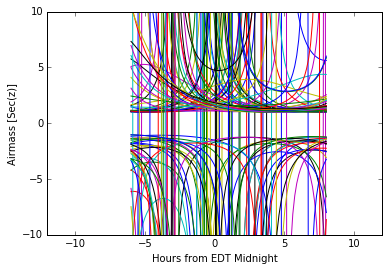

In [225]:
for i in secz_df1.iterrows():
    plt.plot(delta_midnight,np.array(i[1]))  
plt.xlim(-12, 12)  
plt.ylim(-10, 10)  
plt.xlabel('Hours from EDT Midnight')  
plt.ylabel('Airmass [Sec(z)]') 

In [343]:
#secz_df
altaz_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-11d46m19.6066s,-11d57m45.5747s,-12d10m48.6003s,-12d25m27.5205s,-12d41m41.035s,-12d59m27.7098s,-13d18m45.9804s,-13d39m34.156s,-14d01m50.4235s,-14d25m32.8514s,...,-38d08m59.965s,-37d28m21.6934s,-36d46m57.2662s,-36d04m51.984s,-35d22m11.0504s,-34d38m59.5664s,-33d55m22.5281s,-33d11m24.8243s,-32d27m11.2364s,-31d42m46.439s
1,-9d30m04.8884s,-9d27m59.8559s,-9d27m44.8673s,-9d29m19.9456s,-9d32m44.9451s,-9d37m59.552s,-9d45m03.2855s,-9d53m55.4993s,-10d04m35.3843s,-10d17m01.9706s,...,-44d11m17.5707s,-43d36m28.9467s,-43d00m02.0418s,-42d22m03.3916s,-41d42m39.521s,-41d01m56.9133s,-40d20m01.9836s,-39d37m01.0576s,-38d53m00.3544s,-38d08m05.9733s
2,-16d54m11.7024s,-18d11m32.4422s,-19d29m59.3086s,-20d49m27.7706s,-22d09m53.3027s,-23d31m11.3728s,-24d53m17.4288s,-26d16m06.8826s,-27d39m35.0926s,-29d03m37.3429s,...,-8d58m45.4611s,-7d52m15.0317s,-6d47m30.7195s,-5d44m37.3496s,-4d43m39.7676s,-3d44m42.83s,-2d47m51.3935s,-1d53m10.3015s,-1d00m44.3695s,-0d10m38.3675s
3,-12d13m59.8988s,-13d22m20.2477s,-14d32m05.2249s,-15d43m10.2646s,-16d55m30.8171s,-18d09m02.3442s,-19d23m40.3154s,-20d39m20.2s,-21d55m57.4593s,-23d13m27.5363s,...,-15d22m03.4203s,-14d11m21.5382s,-13d02m01.0641s,-11d54m06.5685s,-10d47m42.6395s,-9d42m53.8821s,-8d39m44.9166s,-7d38m20.3743s,-6d38m44.8919s,-5d41m03.1048s
4,-40d16m18.1328s,-41d48m29.0171s,-43d20m27.1488s,-44d52m05.3354s,-46d23m15.7336s,-47d53m49.7307s,-49d23m37.8082s,-50d52m29.3826s,-52d20m12.622s,-53d46m34.2367s,...,7d56m41.1797s,8d25m29.4162s,8d51m03.7227s,9d13m20.7618s,9d32m17.571s,9d47m51.5903s,10d00m00.6876s,10d08m43.1806s,10d13m57.8534s,10d15m43.9698s
5,3d02m55.3855s,2d14m25.2363s,1d23m20.7457s,0d29m46.9658s,-0d26m10.9879s,-1d24m27.9591s,-2d24m58.7715s,-3d27m38.247s,-4d32m21.2225s,-5d39m02.5628s,...,-31d07m23.9527s,-29d38m23.4702s,-28d09m52.6781s,-26d41m56.252s,-25d14m38.7792s,-23d48m04.7834s,-22d22m18.7471s,-20d57m25.1311s,-19d33m28.3918s,-18d10m32.9959s
6,1d58m58.2079s,1d03m56.214s,0d06m28.6807s,-0d53m19.0776s,-1d55m21.739s,-2d59m33.9919s,-4d05m50.5523s,-5d14m06.1768s,-6d24m15.6748s,-7d36m13.917s,...,-27d44m12.3477s,-26d14m47.0949s,-24d46m02.7666s,-23d18m03.8075s,-21d50m54.6354s,-20d24m39.6602s,-18d59m23.301s,-17d35m10.0002s,-16d12m04.2366s,-14d50m10.536s
7,-65d09m24.9716s,-65d47m52.3014s,-66d19m06.7993s,-66d42m37.8918s,-66d58m00.7731s,-67d04m58.3183s,-67d03m22.532s,-66d53m15.2624s,-66d34m48.0341s,-66d08m21.0349s,...,5d58m22.326s,5d22m22.3756s,4d43m27.5554s,4d01m42.2841s,3d17m11.1678s,2d29m58.97s,1d40m10.5825s,0d47m50.9982s,-0d06m54.7149s,-1d04m01.4372s
8,-38d49m50.8029s,-40d41m35.9544s,-42d33m40.3909s,-44d26m00.6786s,-46d18m33.1839s,-48d11m14.0067s,-50d03m58.895s,-51d56m43.1387s,-53d49m21.4308s,-55d41m47.6882s,...,18d21m07.4872s,18d59m47.4107s,19d34m26.9015s,20d04m59.8579s,20d31m20.7352s,20d53m24.6214s,21d11m07.3073s,21d24m25.3499s,21d33m16.1246s,21d37m37.8673s
9,-72d03m20.4099s,-73d33m17.2869s,-74d56m31.1252s,-76d10m56.9726s,-77d13m57.6508s,-78d02m29.7653s,-78d33m26.8304s,-78d44m22.4474s,-78d34m18.755s,-78d04m09.1581s,...,17d52m15.8727s,17d12m29.4743s,16d28m55.7504s,15d41m41.5567s,14d50m54.0322s,13d56m40.5285s,12d59m08.5433s,11d58m25.6589s,10d54m39.4854s,9d47m57.6115s


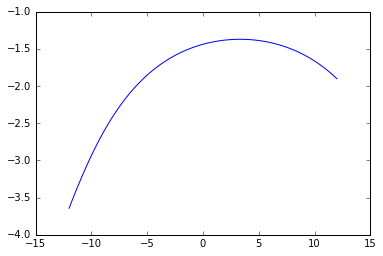

In [16]:
plt.plot(delta_midnight,np.array(seczs_l[0]))

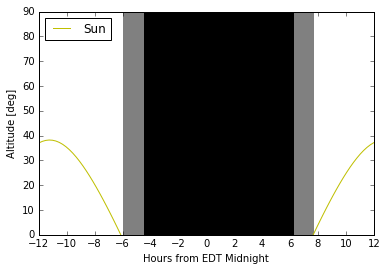

In [17]:
delta_midnight = np.linspace(-12, 12, 100)*u.hour
times = midnight + delta_midnight
altazframe = AltAz(obstime=times, location=lco_location)
sunaltazs = get_sun(times).transform_to(altazframe)

plt.fill_between(delta_midnight.to('hr').value, 0, 90, sunaltazs.alt < -0*u.deg, color='0.5', zorder=0)  
plt.fill_between(delta_midnight.to('hr').value, 0, 90, sunaltazs.alt < -18*u.deg, color='k', zorder=0)  
plt.plot(delta_midnight, sunaltazs.alt, color='y', label='Sun')  
#plt.colorbar().set_label('Azimuth [deg]')  
plt.legend(loc='upper left')  
plt.xlim(-12, 12)  
plt.xticks(np.arange(13)*2 -12)  
plt.ylim(0, 90)  
plt.xlabel('Hours from EDT Midnight')  
plt.ylabel('Altitude [deg]')  

In [382]:
sunaltazs.alt[0] 

<Latitude 20.251565308895437 deg>

In [231]:
print ra_uni
print dec_uni

[1.4935, 3.142958333, 3.8469791669999998, 4.900291667, 5.490791667000001, 6.12629, 10.21670833, 16.3697725, 16.69104, 18.03510583, 18.78431417, 20.65599833, 26.69695833, 27.21699833, 27.56579333, 27.58529167, 28.28787667, 28.35835417, 32.14731417, 34.47380917, 34.76008333, 44.55962833, 164.364585, 164.47604330000001, 174.7939358, 184.5264133, 184.80343249999999, 186.6690608, 189.52816830000003, 195.30471, 201.0151392, 201.4347967, 204.4169392, 205.182415, 208.210995, 208.5785208, 208.71016830000002, 209.02158169999998, 211.0382083, 219.2066058, 221.7194858, 223.3201025, 228.35294580000001, 236.2848367, 255.3110692, 277.5867517, 287.7811183, 293.49156580000005, 298.3677308, 300.5587517, 300.93724249999997, 309.5906325, 311.4306958, 315.8424942, 321.31851919999997, 321.9550517, 322.3023642, 322.753325, 323.27362830000004, 325.4683608, 327.2068992, 331.67237, 332.9605225, 334.2791583, 334.6403492, 335.3094667, 335.7773125, 335.84096, 337.665415, 341.1692817, 342.4987375, 343.5538075, 345.

## Catalog Creation for IObserve
- object name, followed by coordinates per line

In [341]:
ra_uni=final['RA0'].values
dec_uni=final['DEC0'].values
num=np.arange(1,len(ra_uni)+1)

In [342]:
ra_l=[Angle(i, u.deg).to_string(unit=u.hr, sep=':', precision=1, pad=True) for i in ra_uni]
dec_l=[Angle(i, u.deg).to_string(unit=u.degree, sep=':', precision=1, alwayssign=True, pad=True) for i in dec_uni]

ra_n=[Angle(i, u.deg).to_string(unit=u.degree, sep=':', precision=4, pad=True, decimal=True) for i in ra_uni]
dec_n=[Angle(i, u.deg).to_string(unit=u.degree, sep=':', precision=4, alwayssign=True, pad=True, decimal=True) for i in dec_uni]

In [345]:
Angle(ra_uni[0], u.deg).to_string()
#len(ra_l)

u'137d07m18.8879s'

In [347]:
dir="/Users/taweewat/Dropbox/Documents/MIT/Observation/2016_1/"
text_file = open(dir+"2016_iobserve_final.txt", "w")
text_file.write("#Name\t RA\t Dec\t RA\t Dec\n")
text_file.write("#name\t hh:mm:ss.s\t dd:mm:ss\t deg\t deg\n")
for i, item in enumerate(ra_l):
    text_file.write("Target%03i\t %s\t %s\t#%s\t %s\n" % (num[i], ra_l[i], dec_l[i], ra_n[i], dec_n[i]))
text_file.close()

## Catalog Creation
http://www.lco.cl/telescopes-information/magellan/instruments/observing-catalogs/

In [203]:
#num=np.arange(1,len(ra0)+1)
#ra_l=[Angle(i, u.deg).to_string(unit=u.hr, sep=':', precision=1, pad=True) for i in ra0]
#dec_l=[Angle(i, u.deg).to_string(unit=u.degree, sep=':', precision=0, alwayssign=True, pad=True) for i in dec0]
num=np.arange(1,len(ra_uni)+1)
ra_l=[Angle(i, u.deg).to_string(unit=u.hr, sep=':', precision=1, pad=True) for i in ra_uni]
dec_l=[Angle(i, u.deg).to_string(unit=u.degree, sep=':', precision=0, alwayssign=True, pad=True) for i in dec_uni]


In [204]:
dir="/Users/taweewat/Dropbox/Documents/MIT/Observation/2016_1/"
text_file = open(dir+"2016_2.cat", "w")
text_file.write("#\t Name\t RA\t Dec\t equinox\t Rapm\t Decpm\t offset\t rot\t RA_probe1\t Dec_probe1\t equinox\t
RA_probe2\t Dec_probe2\t equinox\t pm_epoch\n")
text_file.write("##\t name\t hh:mm:ss.s\t dd:mm:ss\t yyyy.y\t s.ss\t s.ss\t angle\t mode\t hh:mm:ss.s\t dd:mm:ss\t
yyyy.y\t hh:mm:ss.ss\t dd:mm:ss\t yyyy.y\t yyyy.y\n")
for i, item in enumerate(ra_l):
    text_file.write("%03i\t Field%03i\t %s\t %s\t 2000.0\t 0.00\t 0.00\t OFF\t 00:00:00.0\t 00:00:00\t 0.0 00:00:00.0\t
    00:00:00\t 0.0\t 0.0\n" % (num[i], num[i], ra_l[i], dec_l[i]))
text_file.close()

<hr>

### other coding

In [232]:
def cooling(logT,filename='mzero.cie'):
    path='/Users/taweewat/Documents/chandra/codes/cooling/'
    filename=filename
    dfcool=pd.read_csv(path+filename,sep='\t',header=1)
    if np.max(logT) > np.max(dfcool['log(T)']):
        return 'logT values too large'
    elif np.min(logT) < np.min(dfcool['log(T)']):
        return 'logT values too small'
    else:
        return np.interp(logT, dfcool['log(T)'], dfcool['log(lambda net)'])

In [236]:
logT=[4.002,4.123,6.437]

In [227]:
np.interp(logT, dfcool['log(T)'], dfcool['log(lambda net)'])

array([-25.986 , -23.116 , -23.2152])